#### Data Exploration and Feature Engineering

In this section, we will perform initial data exploration, feature engineering, and data visualization to prepare our dataset for machine learning tasks. Here's an overview of the steps we will take:

### Step a: Download the Dataset
We will fetch our dataset from the provided by edge-ml.

### Step b: Data Integration
We will combine all the individual datasets into a single Pandas DataFrame, ensuring that our data is structured for analysis and modeling.

### Step c: Feature Extraction
Using the Pandas library, we will create rolling windows of data to perform time-based feature extraction. We will compute statistics such as mean and variance within these windows to create meaningful features.

### Step d: Data Visualization
We will employ the Seaborn library to visualize our feature space.

### Step e: Feature Normalization
To ensure that our features are on a consistent scale, we will normalize the data. Normalization helps prevent features with larger scales from dominating in certain machine learning algorithms.

Throughout these steps, we will gradually refine and prepare our dataset for the subsequent machine learning tasks. Let's get started!


In [37]:
from edgeml import DatasetReceiver
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
project = DatasetReceiver("https://app.edge-ml.org", "3220e00cec76db63f6bd5f6e4b3c1f4f")

In [38]:
project.datasets[0].loadData()
project.datasets[0].data.head()

time  accX  accY  accZ   acc
0 2023-09-15 15:11:03.441 -0.66  0.22 -1.22  Walk
1 2023-09-15 15:11:03.458 -1.21  0.24 -0.83  Walk
2 2023-09-15 15:11:03.475 -1.18  0.71 -0.82  Walk
3 2023-09-15 15:11:03.491 -0.27  0.93  0.04  Walk
4 2023-09-15 15:11:03.508  0.75  0.66  0.49  Walk

In [49]:
#join all datasets into a single dataframe
import pandas as pd

group_count = 1
dataset_to_group = {}

df = pd.DataFrame()
for dataset in project.datasets:
        dataset.loadData()
        data = dataset.data

        if data is not None:
                        # Check if the dataset name already has a group assigned
                if dataset.name in dataset_to_group:
                        group = dataset_to_group[dataset.name]
                else:
                        # If not, assign a new group identifier using LabelEncoder
                        print(f"Assigning group {group_count} to dataset: " + dataset.name)                   
                        dataset_to_group[dataset.name] = group_count
                        group_count += 1
        
        # Add the 'group' column to the data
                data['group'] = group
                df = df.append(data, ignore_index=True)

#Rename acc column with target 
df = df.rename(columns={'acc': 'target'})

#Drop empty or empty string target values
df = df.dropna(subset=['target'])
df = df[df.target != '']

Assigning group 1 to dataset: datasetName
Assigning group 2 to dataset: datasetName_2


In [50]:
df['group'].unique()

array([2, 1])

In [51]:
df.describe()

accX          accY          accZ         group
count  48903.000000  48989.000000  48959.000000  49709.000000
mean      -0.659426      0.587917     -0.355237      1.096341
std        3.681222      3.343935      2.281723      0.295061
min      -56.970001    -28.290001    -21.240000      1.000000
25%       -1.720000     -0.970000     -1.440000      1.000000
50%       -0.130000      0.120000     -0.050000      1.000000
75%        0.740000      1.680000      0.910000      1.000000
max       24.000000     40.950001     41.970001      2.000000

In [52]:
# clean df
df = df.dropna()
df = df.drop_duplicates()
df.describe()

accX          accY          accZ         group
count  29764.000000  29764.000000  29764.000000  29764.000000
mean      -0.776860      0.735994     -0.463961      1.095686
std        4.331465      3.887332      2.422753      0.294165
min      -56.970001    -28.290001    -21.240000      1.000000
25%       -2.320000     -1.140000     -1.740000      1.000000
50%       -0.150000      0.090000     -0.140000      1.000000
75%        1.090000      2.210000      0.850000      1.000000
max       24.000000     40.950001     41.970001      2.000000

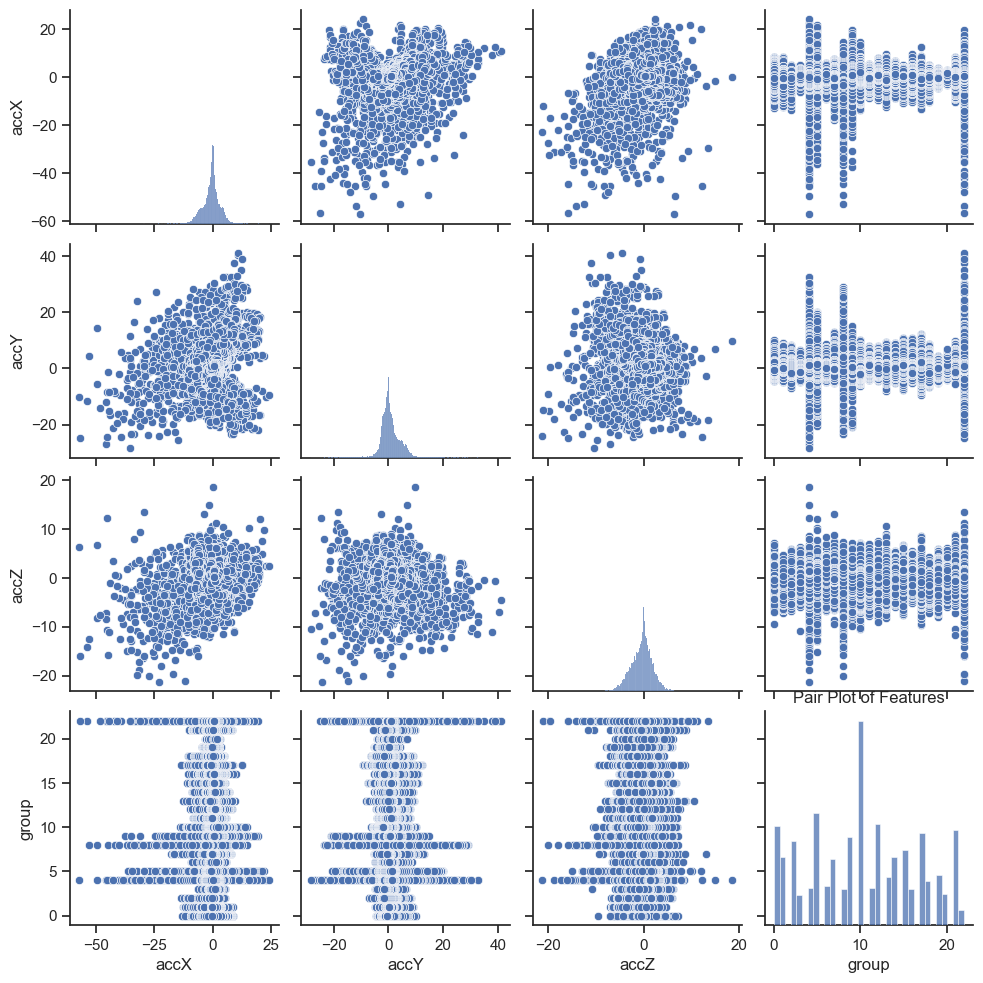

In [ ]:
sns.set(style="ticks")
sns.pairplot(df)
plt.title('Pair Plot of Features')
plt.show()


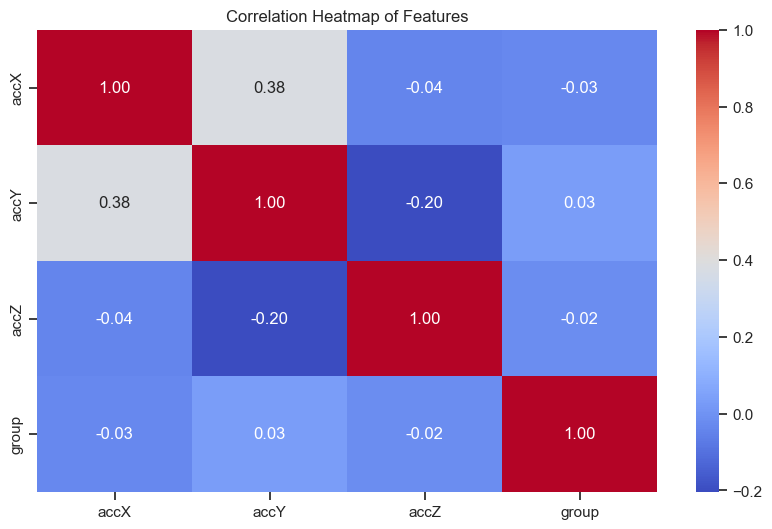

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


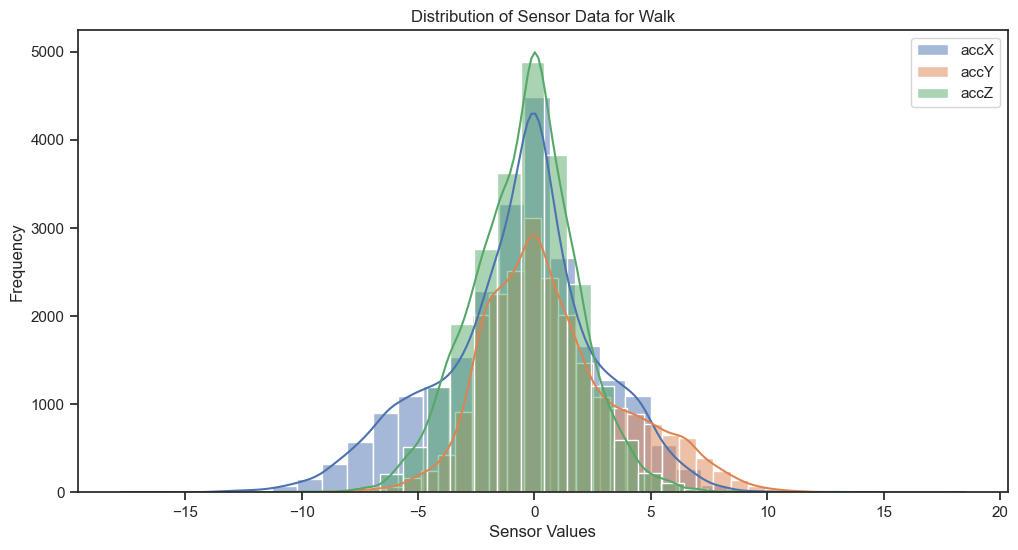

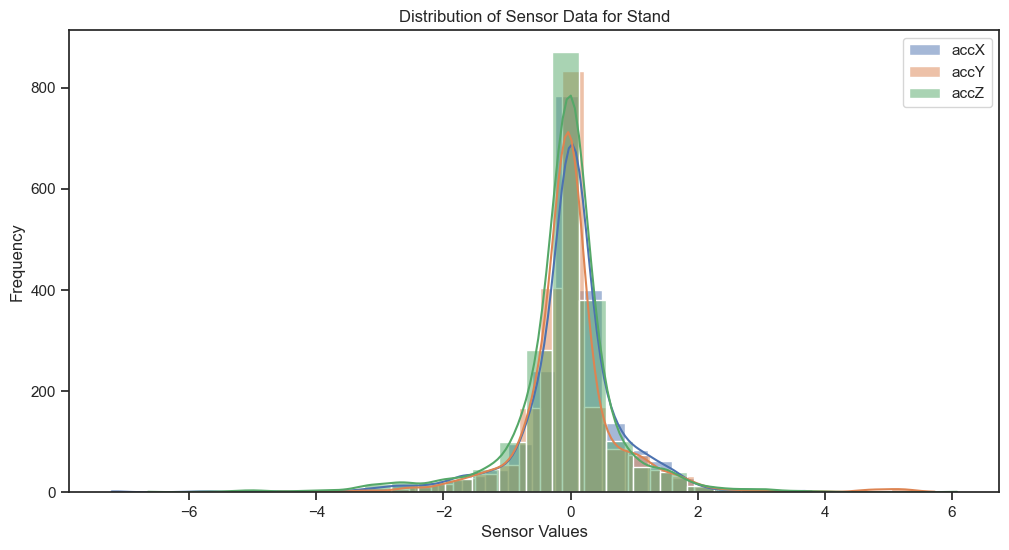

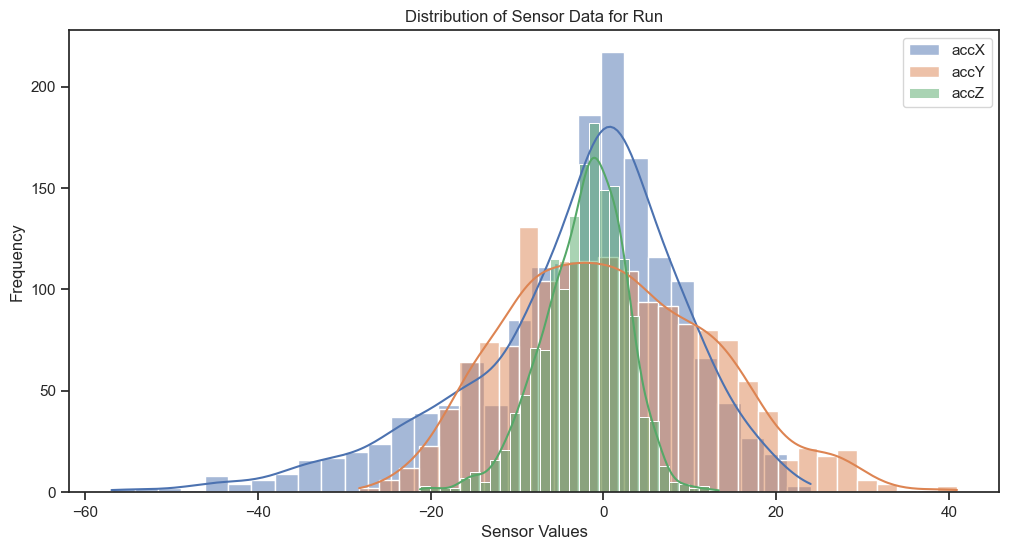

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with the relevant columns

# Filter the data for each target class
target_classes = ['Walk', 'Stand', 'Run']

for target_class in target_classes:
    target_data = df[df['target'] == target_class]
    
    if not target_data.empty:
        plt.figure(figsize=(12, 6))
        sns.histplot(data=target_data, x='accX', bins=30, label='accX', kde=True)
        sns.histplot(data=target_data, x='accY', bins=30, label='accY', kde=True)
        sns.histplot(data=target_data, x='accZ', bins=30, label='accZ', kde=True)
        plt.xlabel('Sensor Values')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Sensor Data for {target_class}')
        plt.legend()
        plt.show()
    else:
        print(f"No data found for target class {target_class}")



In [53]:
import pandas as pd

window_size = 10

# Create a new DataFrame to store the features
window_df = pd.DataFrame()

# Define the columns for which you want to calculate mean and variance
columns_to_process = ["accX", "accY", "accZ"]

# Loop through each column and calculate mean and variance for the windows
for column in columns_to_process:
    # Calculate the rolling mean for the current column
    mean_col = df[column].rolling(window=window_size).mean()    
    # Calculate the rolling variance for the current column
    var_col = df[column].rolling(window=window_size).var()

    # Add the mean and variance as features to the features DataFrame
    window_df[f"{column}_mean"] = mean_col
    window_df[f"{column}_variance"] = var_col

window_df['target'] = df['target']
window_df['group'] = df['group']

window_df.dropna(inplace=True)

window_df.head()


accX_mean  accX_variance  accY_mean  accY_variance  accZ_mean  \
10     -0.106       0.579138      0.476       0.079093     -0.120   
11     -0.118       0.595351      0.405       0.169894     -0.096   
12     -0.058       0.485751      0.329       0.255521     -0.116   
13      0.049       0.333454      0.216       0.287538     -0.141   
14      0.107       0.325979      0.108       0.232818     -0.322   

    accZ_variance target  group  
10       0.388422   Walk      2  
11       0.335516   Walk      2  
12       0.372138   Walk      2  
13       0.417499   Walk      2  
14       0.672307   Walk      2

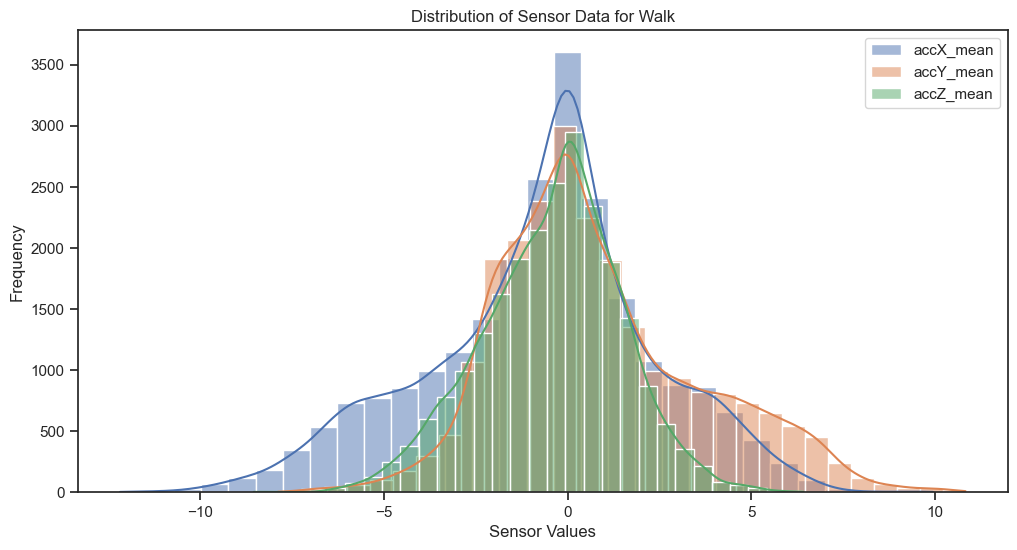

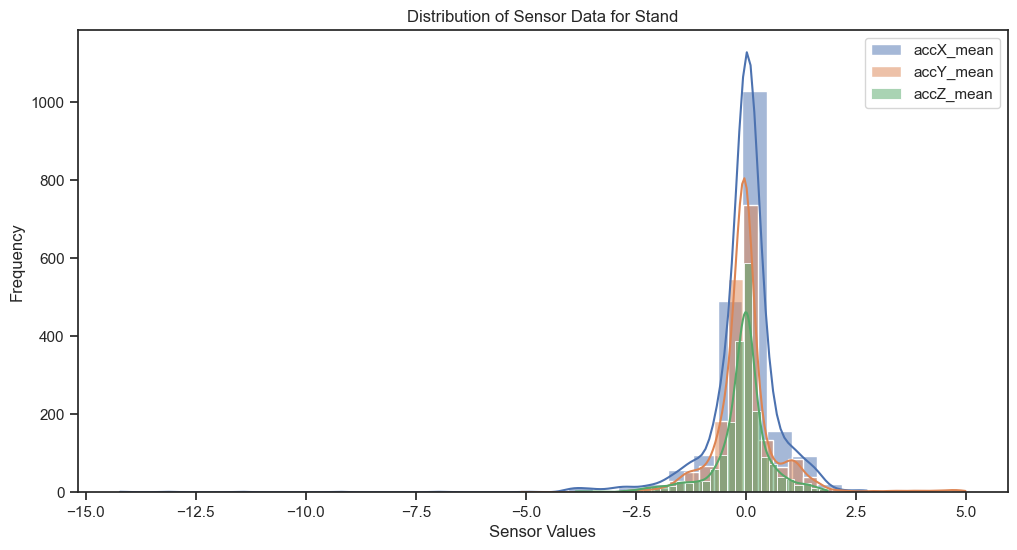

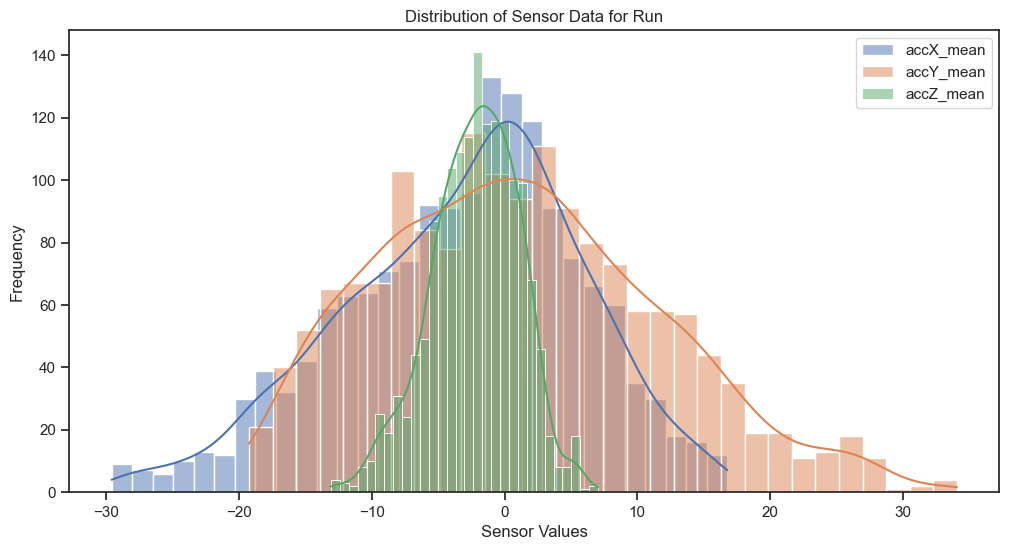

In [ ]:
for target_class in target_classes:
    target_data = window_df[window_df['target'] == target_class]
    
    if not target_data.empty:
        plt.figure(figsize=(12, 6))
        sns.histplot(data=target_data, x='accX_mean', bins=30, label='accX_mean', kde=True)
        sns.histplot(data=target_data, x='accY_mean', bins=30, label='accY_mean', kde=True)
        sns.histplot(data=target_data, x='accZ_mean', bins=30, label='accZ_mean', kde=True)
        plt.xlabel('Sensor Values')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Sensor Data for {target_class}')
        plt.legend()
        plt.show()
    else:
        print(f"No data found for target class {target_class}")

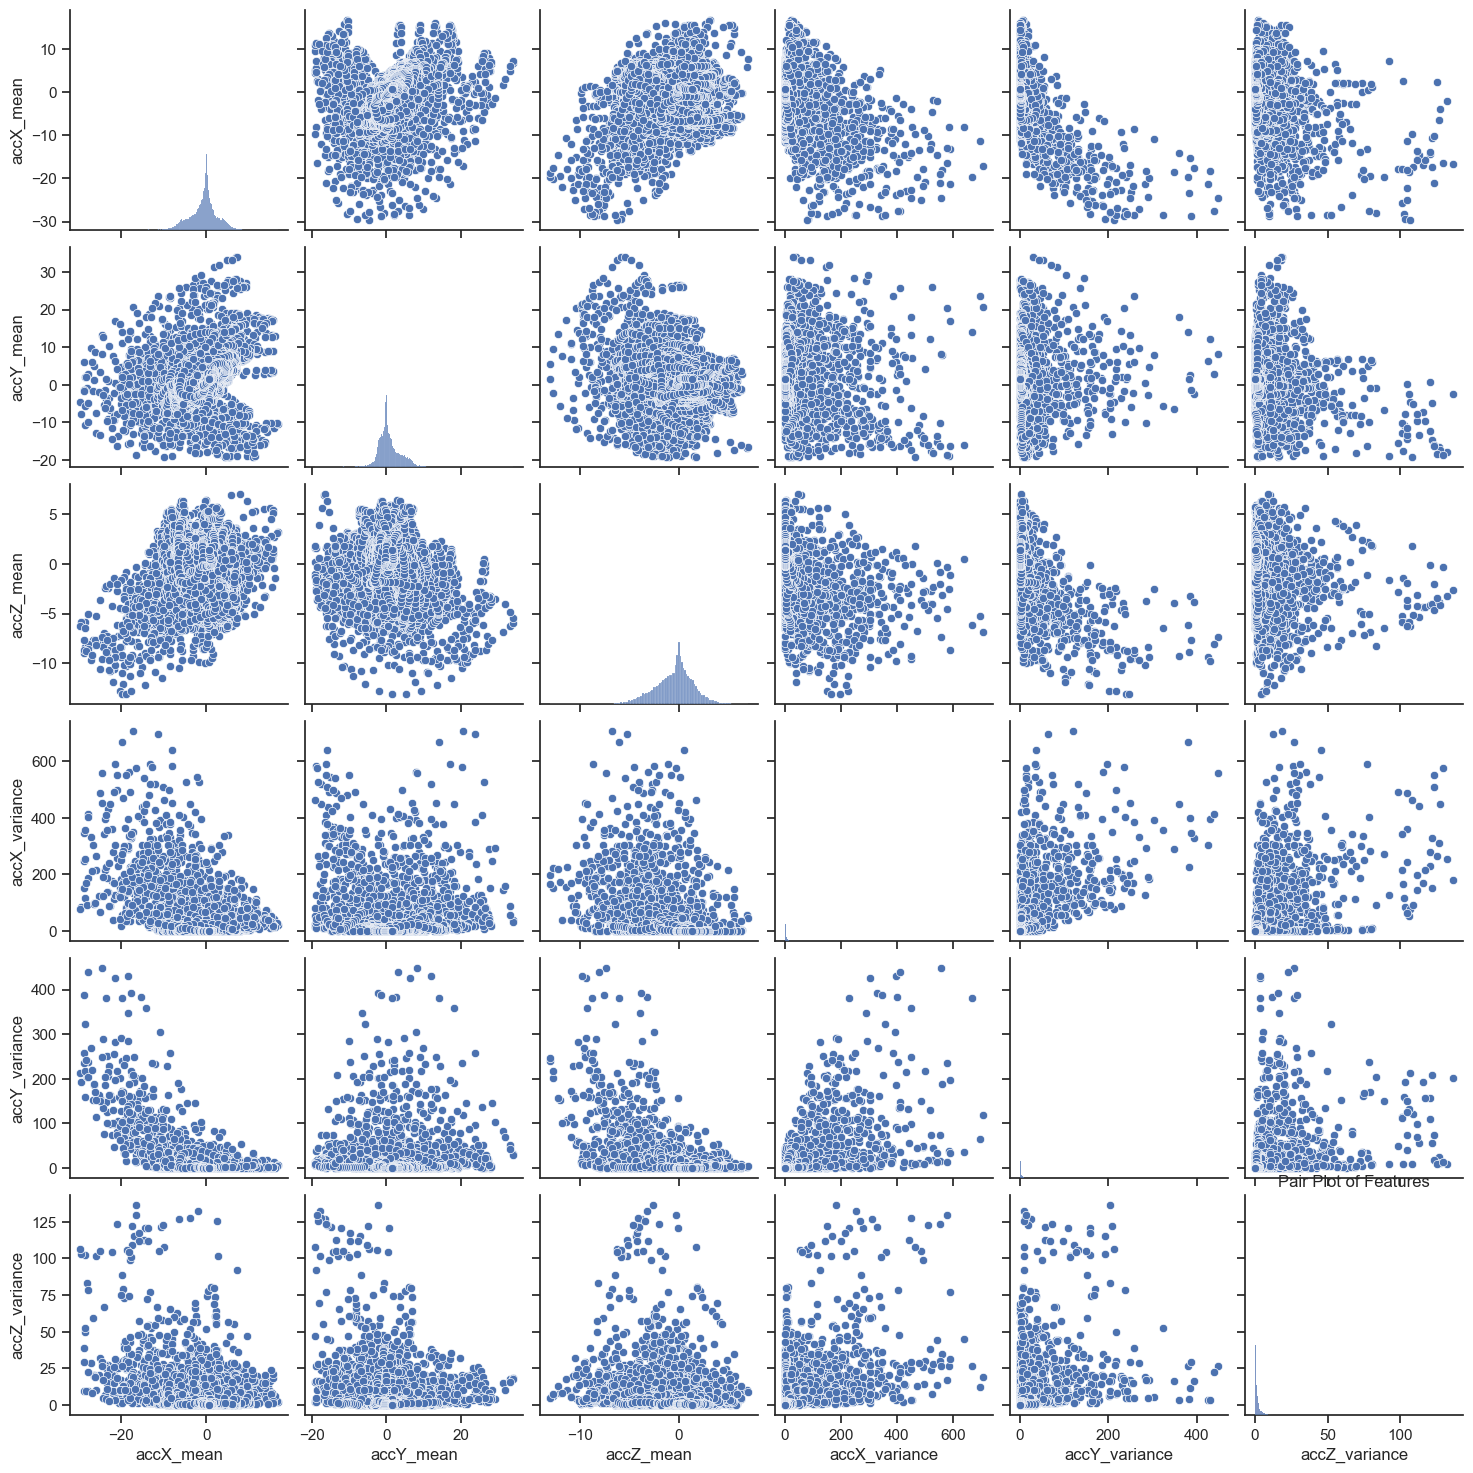

In [ ]:
sns.set(style="ticks")
sns.pairplot(window_df[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']])
plt.title('Pair Plot of Features')
plt.show()


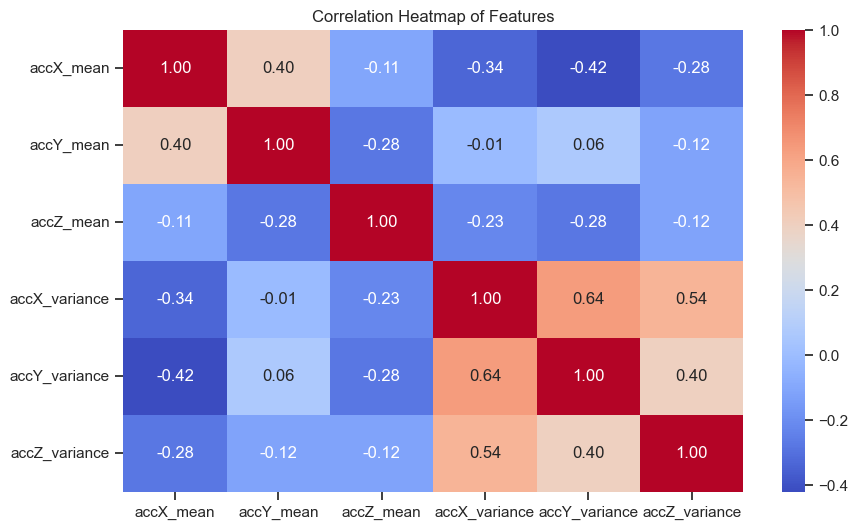

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = window_df[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


In [ ]:
window_df.head()

accX_mean  accX_variance  accY_mean  accY_variance  accZ_mean  \
10     -0.106       0.579138      0.476       0.079093     -0.120   
11     -0.118       0.595351      0.405       0.169894     -0.096   
12     -0.058       0.485751      0.329       0.255521     -0.116   
13      0.049       0.333454      0.216       0.287538     -0.141   
14      0.107       0.325979      0.108       0.232818     -0.322   

    accZ_variance target  group  
10       0.388422   Walk      0  
11       0.335516   Walk      0  
12       0.372138   Walk      0  
13       0.417499   Walk      0  
14       0.672307   Walk      0

In [54]:
# Normalize the data
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
window_df[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']] = Scaler.fit_transform(window_df[['accX_mean', 'accY_mean', 'accZ_mean', 'accX_variance', 'accY_variance', 'accZ_variance']])
window_df.head()

accX_mean  accX_variance  accY_mean  accY_variance  accZ_mean  \
10   0.187497      -0.182547  -0.073471      -0.182969   0.174985   
11   0.184144      -0.182057  -0.093522      -0.177004   0.187192   
12   0.200909      -0.185369  -0.114986      -0.171379   0.177019   
13   0.230807      -0.189971  -0.146900      -0.169275   0.164304   
14   0.247013      -0.190197  -0.177401      -0.172870   0.072244   

    accZ_variance target  group  
10      -0.256077   Walk      2  
11      -0.263440   Walk      2  
12      -0.258343   Walk      2  
13      -0.252030   Walk      2  
14      -0.216568   Walk      2

Excercise 4

a. Do a leave-one-subject out test train split, e.g. using skleanr: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneGroupOut.html
b. Train different classifiers like those used here: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html and compare accuracy, precission, recall, F1-Score
c. Compare leave one subject out against simple 10-fold crossvalidation results of best models
d. Select a feature subset you believe is good based on the last excercise and compare best models
e. Perform a recursive https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html on models that support

In [58]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

label_encoder = LabelEncoder()

X = window_df.drop(columns=['target'])
y = label_encoder.fit_transform(window_df['target'])


print("Class distribution before oversampling:", Counter(window_df['target']))

# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to oversample the minority classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)
y_resampled

Class distribution before oversampling: Counter({'Walk': 24537, 'Stand': 3625, 'Run': 1593})
Class distribution after oversampling: Counter({2: 24537, 1: 24537, 0: 24537})
Label Mapping: {'Run': 0, 'Stand': 1, 'Walk': 2}


array([2, 2, 2, ..., 1, 1, 1])

In [59]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Define a list of classifiers
classifiers = [
    ("K-Nearest Neighbor", KNeighborsClassifier()),
    ("Naïve Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Support Vector Machines", SVC()),
    ("Random Forests", RandomForestClassifier(n_estimators=100))
]

# Initialize LeaveOneGroupOut
logo = LeaveOneGroupOut()

# Initialize dictionaries to accumulate metrics for each classifier
metrics = {classifier_name: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for classifier_name, _ in classifiers}

groups = df['group']

# Iterate through the LeaveOneGroupOut splits
for train_index, test_index in logo.split(X_resampled, y_resampled, groups=groups):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
    # Iterate through each classifier
    for classifier_name, classifier in classifiers:
        # Initialize and train the classifier
        classifier.fit(X_train, y_train)
    
        # Make predictions on the test set
        y_pred = classifier.predict(X_test)
    
        # Calculate metrics and store them
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        metrics[classifier_name]['accuracy'].append(accuracy)
        metrics[classifier_name]['precision'].append(precision)
        metrics[classifier_name]['recall'].append(recall)
        metrics[classifier_name]['f1_score'].append(f1)

# Print metrics for each classifier
for classifier_name, classifier_metrics in metrics.items():
    print(f"Metrics for {classifier_name}:")
    print(f"  Accuracy: {sum(classifier_metrics['accuracy']) / len(classifier_metrics['accuracy'])}")
    print(f"  Precision: {sum(classifier_metrics['precision']) / len(classifier_metrics['precision'])}")
    print(f"  Recall: {sum(classifier_metrics['recall']) / len(classifier_metrics['recall'])}")
    print(f"  F1-Score: {sum(classifier_metrics['f1_score']) / len(classifier_metrics['f1_score'])}")
    print()


ValueError: Found input variables with inconsistent numbers of samples: [73611, 73611, 29764]

In [60]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score

# Import your models, metrics, and dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier  # Replace with your model imports
from sklearn.svm import SVC  # Replace with your model imports

classifiers = [
    ("K-Nearest Neighbor", KNeighborsClassifier()),
    ("Naïve Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Support Vector Machines", SVC()),
    ("Random Forests", RandomForestClassifier(n_estimators=100))
]

# Initialize a KFold cross-validation object
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize dictionaries to accumulate metrics for each classifier
metrics = {classifier_name: {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []} for classifier_name, _ in classifiers}

# Iterate through the KFold splits
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled[train_index], y_resampled[test_index]
    
    # Iterate through each classifier
    for classifier_name, classifier in classifiers:
        # Initialize and train the classifier
        classifier.fit(X_train, y_train)
    
        # Make predictions on the test set
        y_pred = classifier.predict(X_test)
    
        # Calculate metrics and store them
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
        
        metrics[classifier_name]['accuracy'].append(accuracy)
        metrics[classifier_name]['precision'].append(precision)
        metrics[classifier_name]['recall'].append(recall)
        metrics[classifier_name]['f1_score'].append(f1)

# Print metrics for each classifier
for classifier_name, classifier_metrics in metrics.items():
    print(f"Metrics for {classifier_name}:")
    print(f"  Accuracy: {np.mean(classifier_metrics['accuracy'])}")
    print(f"  Precision: {np.mean(classifier_metrics['precision'])}")
    print(f"  Recall: {np.mean(classifier_metrics['recall'])}")
    print(f"  F1-Score: {np.mean(classifier_metrics['f1_score'])}")
    print()

Metrics for K-Nearest Neighbor:
  Accuracy: 0.94646285126954
  Precision: 0.946135541405031
  Recall: 0.94646285126954
  F1-Score: 0.9457161826034641

Metrics for Naïve Bayes:
  Accuracy: 0.7941183473389355
  Precision: 0.8795565600501908
  Recall: 0.7941183473389355
  F1-Score: 0.8159471160917221

Metrics for Decision Tree:
  Accuracy: 0.9324482809252732
  Precision: 0.9328326995151375
  Recall: 0.9324482809252732
  F1-Score: 0.9325927341205414

Metrics for Support Vector Machines:
  Accuracy: 0.9224332474925454
  Precision: 0.9254807143718308
  Recall: 0.9224332474925454
  F1-Score: 0.9228764692525306

Metrics for Random Forests:
  Accuracy: 0.9592001219842776
  Precision: 0.9590902280771589
  Recall: 0.9592001219842776
  F1-Score: 0.9578150995086248



The following code block is commented out because it was found that collecting sensor data using Safari on an iPhone was difficult, resulting in a dataset with only 6 features. In the context of feature selection and Recursive Feature Elimination (RFE), it does not make sense to execute the RFE algorithm with such a small number of features. 

The code attempted to perform RFE (Recursive Feature Elimination) on various machine learning classifiers to select the top 3 features for each classifier. The classifiers included in the loop are:

1. Decision Tree
2. Support Vector Machines

For each classifier, the code used RFE to select 3 features based on their importance and then printed the selected features and their rankings. This process was meant to help in feature selection and potentially improve model performance.

However, due to the limited number of features (only 6 in this case), the RFE algorithm's effectiveness is limited. Therefore, the code has been commented out, as it would not provide meaningful results with such a small feature set.


In [1]:
'''
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

classifiers = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forests", RandomForestClassifier())
    ("Support Vector Machines", SVC()),
]

for classifier_name, model in classifiers:
    print(f"RFE for {classifier_name}:")

    rfe = RFE(model, n_features_to_select=3, step=1)

    rfe.fit(X_resampled, y_resampled)
    
    selected_features = rfe.support_
    ranking = rfe.ranking_
    
    # Print the selected features and their rankings
    print("Selected Features:", selected_features)
    print("Feature Rankings:", ranking)
    print()
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_resampled, y_resampled)
print(selector.support_)
print(selector.ranking_)'''

<>:7: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:7: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
/var/folders/6j/crb_xtld3f173cyb14l32d1h0000gn/T/ipykernel_16114/1325061740.py:7: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  ("Random Forests", RandomForestClassifier())
/var/folders/6j/crb_xtld3f173cyb14l32d1h0000gn/T/ipykernel_16114/1325061740.py:7: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  ("Random Forests", RandomForestClassifier())
/var/folders/6j/crb_xtld3f173cyb14l32d1h0000gn/T/ipykernel_16114/1325061740.py:7: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
  ("Random Forests", RandomForestClassifier())


NameError: name 'DecisionTreeClassifier' is not defined

a. choose a model you want to optimize and build your own Bayesian Optimizer using https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html

ModuleNotFoundError: No module named 'skopt'

Deployment

In [ ]:
### Fit best model
from sklearn.externals import joblib

final_model = SVC()
final_model.fit(X_resampled, y_resampled)

joblib.dump(clf, 'svm_model.pkl')

In [ ]:
from skl2onnx import convert
from skl2onnx.common.data_types import FloatTensorType

# Load the saved model
clf = joblib.load('svm_model.pkl')

# Convert the model to ONNX format
initial_type = [('input', FloatTensorType([None, X.shape[1]]))]
onx = convert(clf, initial_types=initial_type)

# Save the ONNX model
with open("svm_model.onnx", "wb") as f:
    f.write(onx.SerializeToString())